## 04.자동미분

In [1]:
import torch

### 4-1.requires_grad

In [8]:
x = torch.ones(3,requires_grad=True)
print(x)
print(x.grad)
print(x.grad_fn)
print(x.requires_grad)

tensor([1., 1., 1.], requires_grad=True)
None
None
True


In [9]:
y = 2 * x
print(y)
print(y.grad)
print(y.grad_fn)
print(y.requires_grad)

tensor([2., 2., 2.], grad_fn=<MulBackward0>)
None
True


C:\Users\ckddl\AppData\Local\Temp\ipykernel_15836\268873173.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:494.)
  print(y.grad)


In [10]:
z = y ** 2
print(z)
# print(z.grad)
# print(z.grad_fn)
# print(z.requires_grad)

tensor([4., 4., 4.], grad_fn=<PowBackward0>)


## 4.2 backward()
 - x -> y -> z 계산을 역전파를 통해 기울기를 구함 
 (하나의 노드로) 가중치계산

In [11]:
result = z.sum()
result.backward()

In [12]:
print(z)
print(x.grad)

tensor([4., 4., 4.], grad_fn=<PowBackward0>)
tensor([8., 8., 8.])


### 4-3 nograd()
- 역전파를 중지(자동미분 중지)

In [17]:
x = torch.tensor(1.0,requires_grad=True)

print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
    y = x **2
    print(x.requires_grad)
    print(y.requires_grad)

True
True
True
False


### 4-4.detach()
- 그래프에서 연산을 분리

In [19]:
y.detach()

tensor(1.)

In [35]:
%pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 2.8 MB/s eta 0:00:03
   ----- ---------------------------------- 1.0/8.0 MB 2.7 MB/s eta 0:00:03
   --------- ------------------------------ 1.8/8.0 MB 2.7 MB/s eta 0:00:03
   ------------- -------------------------- 2.6/8.0 MB 3.0 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/8.0 MB 3.3 MB/s eta 0:00:02
   ---------------------- ----------------- 4.5/8.0 MB 3.4 MB/s eta 0:00:02
   -------------------------- ------------- 5.2/8.0 MB 3.5 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.0 MB 3.5 MB/s eta 0:00:01
   ----------------------------------- ---- 7.1/8.0 MB 3.6 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 3.7 MB/s eta 0:00:01
   --------------------------------------

Epch [50/400],Loss:4.3948
Epch [100/400],Loss:4.2099
Epch [150/400],Loss:4.0975
Epch [200/400],Loss:4.0292
Epch [250/400],Loss:3.9876
Epch [300/400],Loss:3.9624
Epch [350/400],Loss:3.9470
Epch [400/400],Loss:3.9377


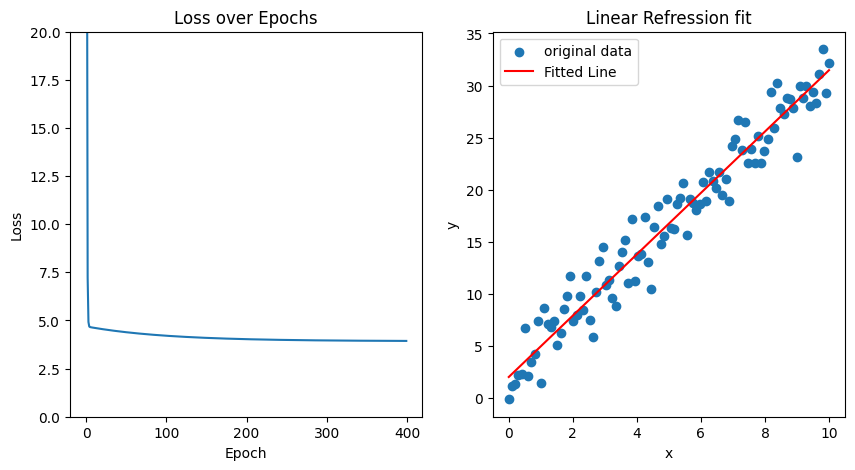

Model paramiters
linear.weight:tensor([[2.9481]])
linear.bias:tensor([1.9930])


In [43]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
# 선형회귀 연습

# 1. 입출력 정의
x = torch.linspace(0,10,100).view(-1,1) # 입력 데이터
y = 3 * x + 2 + torch.randn(100,1)*2

# 2. 모델 정의

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel,self).__init__()
        self.linear = nn.Linear(1,1)
        
    def forward(self,x):
        return self.linear(x)
    
model =LinearRegressionModel()

# 3. 손실함수 정의
# 손실함수 선택:MSE,MAE ...
loss_function = nn.MSELoss()

# 4. 가중치 업데이트
# 경사 하강법 -> 어떤 것을 사용할지 선택
#lr = learning rate
optimizer = optim.SGD(model.parameters(),lr =0.01)

# 5.학습 반복
epochs = 400
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()   #기울기 초기화
    outputs = model(x)  #예측값 계산
    loss = loss_function(outputs,y) #손실 계산
    loss.backward() #역전파진행
    optimizer.step()    #가중치 업데이트

    losses.append(loss.item())  #손실값 저장

    if (epoch+1) % 50 ==0:
        print(f"Epch [{epoch+1}/{epochs}],Loss:{loss.item():.4f}")

# 6. 결과 시각화
plt.figure(figsize =(10,5))

# 손실 갑소 그래프
plt.subplot(1,2,1)
plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylim(0,20)
plt.ylabel("Loss")

#데이터와 예측 결과 시각화

plt.subplot(1,2,2)
plt.scatter(x.numpy(),y.numpy(),label = "original data")
plt.plot(x.numpy(),model(x).detach().numpy(),color = "r",label = "Fitted Line")
plt.title("Linear Refression fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.show()

print("Model paramiters")
for name,param in model.named_parameters():
    print(f"{name}:{param.data}")